In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import AllChem,rdMolDescriptors, QED
from rdkit.Chem.Draw import IPythonConsole

In [10]:
df = pd.read_csv('data_package.csv')
df = df.drop_duplicates('SMILES')

In [11]:
df['ROMol'] = [Chem.MolFromSmiles(smi) for smi in df.SMILES]

In [14]:
df[(df.CMET_score>7)&(df.EGFR_score>7)].describe()

,Score,PriorLogP,CMET_score,EGFR_score,DELTA
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1232.418148,-73.167407,7.128951,7.065983,-0.062968
std,372.953794,16.918127,0.095033,0.065627,0.117291
min,1.000000,-123.310000,7.000498,7.000238,-0.356221
25%,1118.610000,-80.660000,7.049048,7.023972,-0.126089
50%,1150.560000,-73.240000,7.112270,7.051349,-0.053687
75%,1226.020000,-64.140000,7.190262,7.092703,0.002131
max,2907.710000,-36.230000,7.380321,7.440710,0.392702


In [218]:
df[(df.CMET_score>7)&(df.DELTA<-2)&(df.QED>0.5)].describe()

,Score,PriorLogP,CMET_score,EGFR_score,DELTA,QED
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,18.992405,-100.961392,7.567640,5.059728,-2.507912,0.768082
std,1.433740,18.394981,0.117194,0.111860,0.160230,0.089215
min,15.250000,-163.140000,7.123186,4.840642,-2.838945,0.523103
25%,17.980000,-110.140000,7.493707,4.979889,-2.637527,0.705102
50%,19.050000,-100.380000,7.572443,5.051560,-2.523365,0.791245
75%,20.170000,-89.130000,7.648060,5.129952,-2.399238,0.835112
max,22.310000,-48.880000,7.859089,5.545057,-2.022438,0.926726


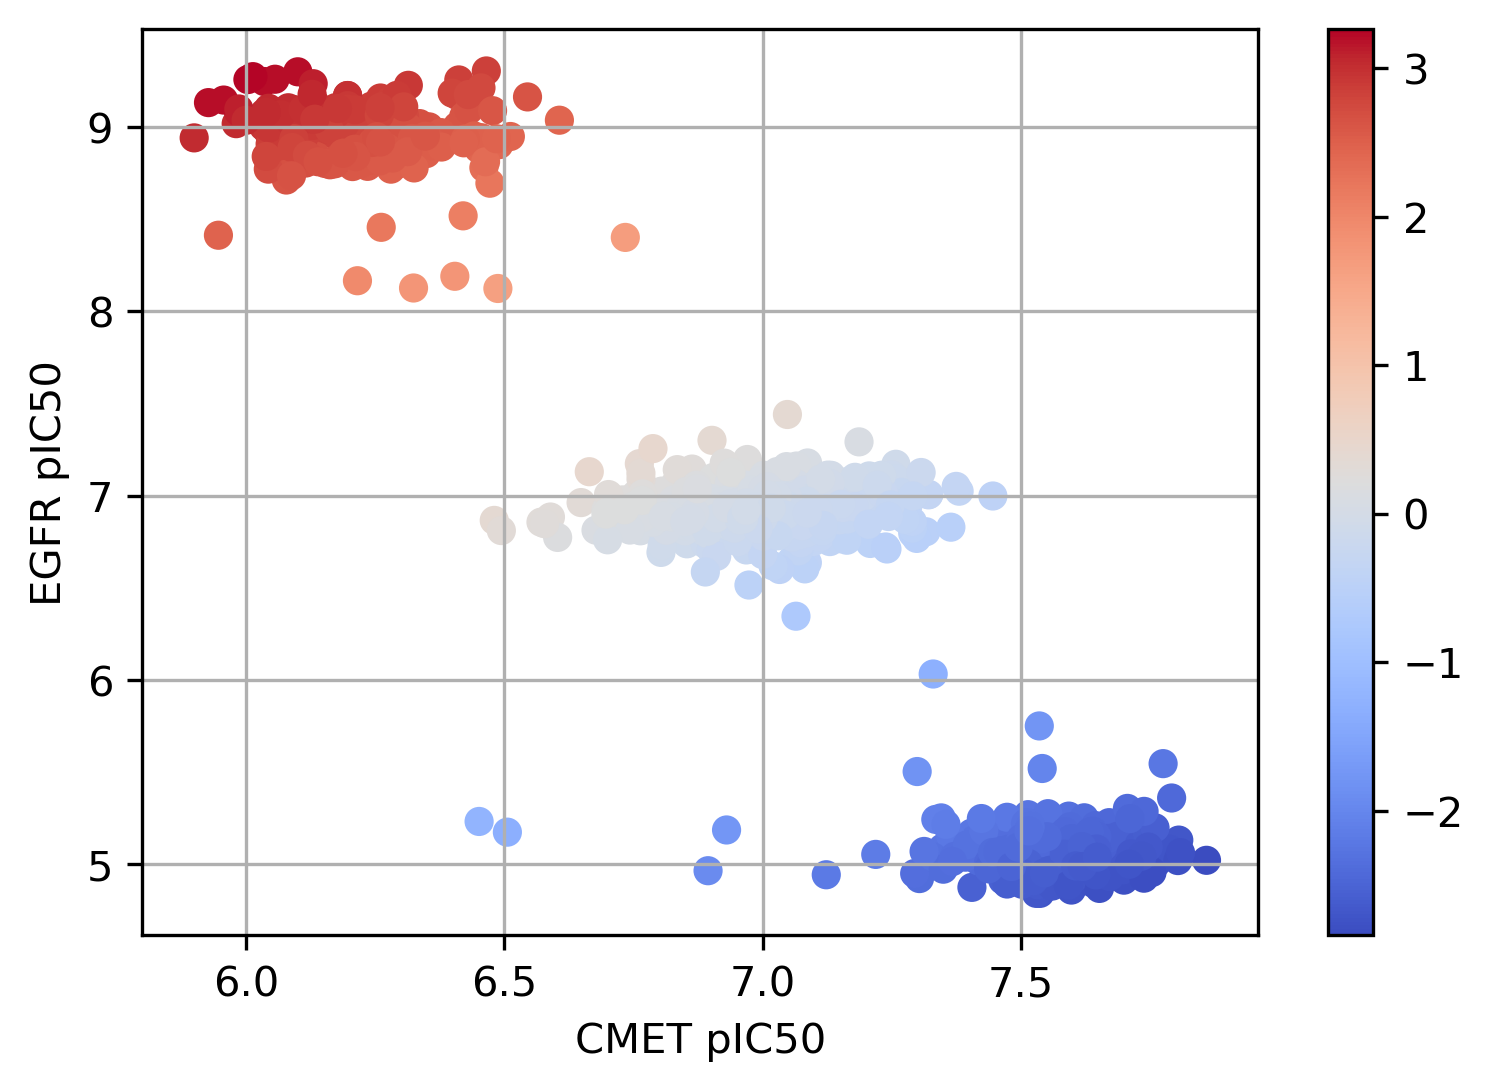

In [28]:
import matplotlib
matplotlib.rcParams['figure.dpi']=300
ax = plt.scatter(df.CMET_score,df.EGFR_score,c=df.DELTA,cmap=plt.cm.coolwarm)
plt.colorbar(ax)
plt.xlabel('CMET pIC50')
plt.ylabel('EGFR pIC50')
plt.grid()
plt.savefig('Results.png',dpi=300)

In [29]:
df['FPS'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m,2,1024) for m in df.ROMol]

In [30]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE()

In [36]:
res = tsne.fit_transform(list(df.FPS))

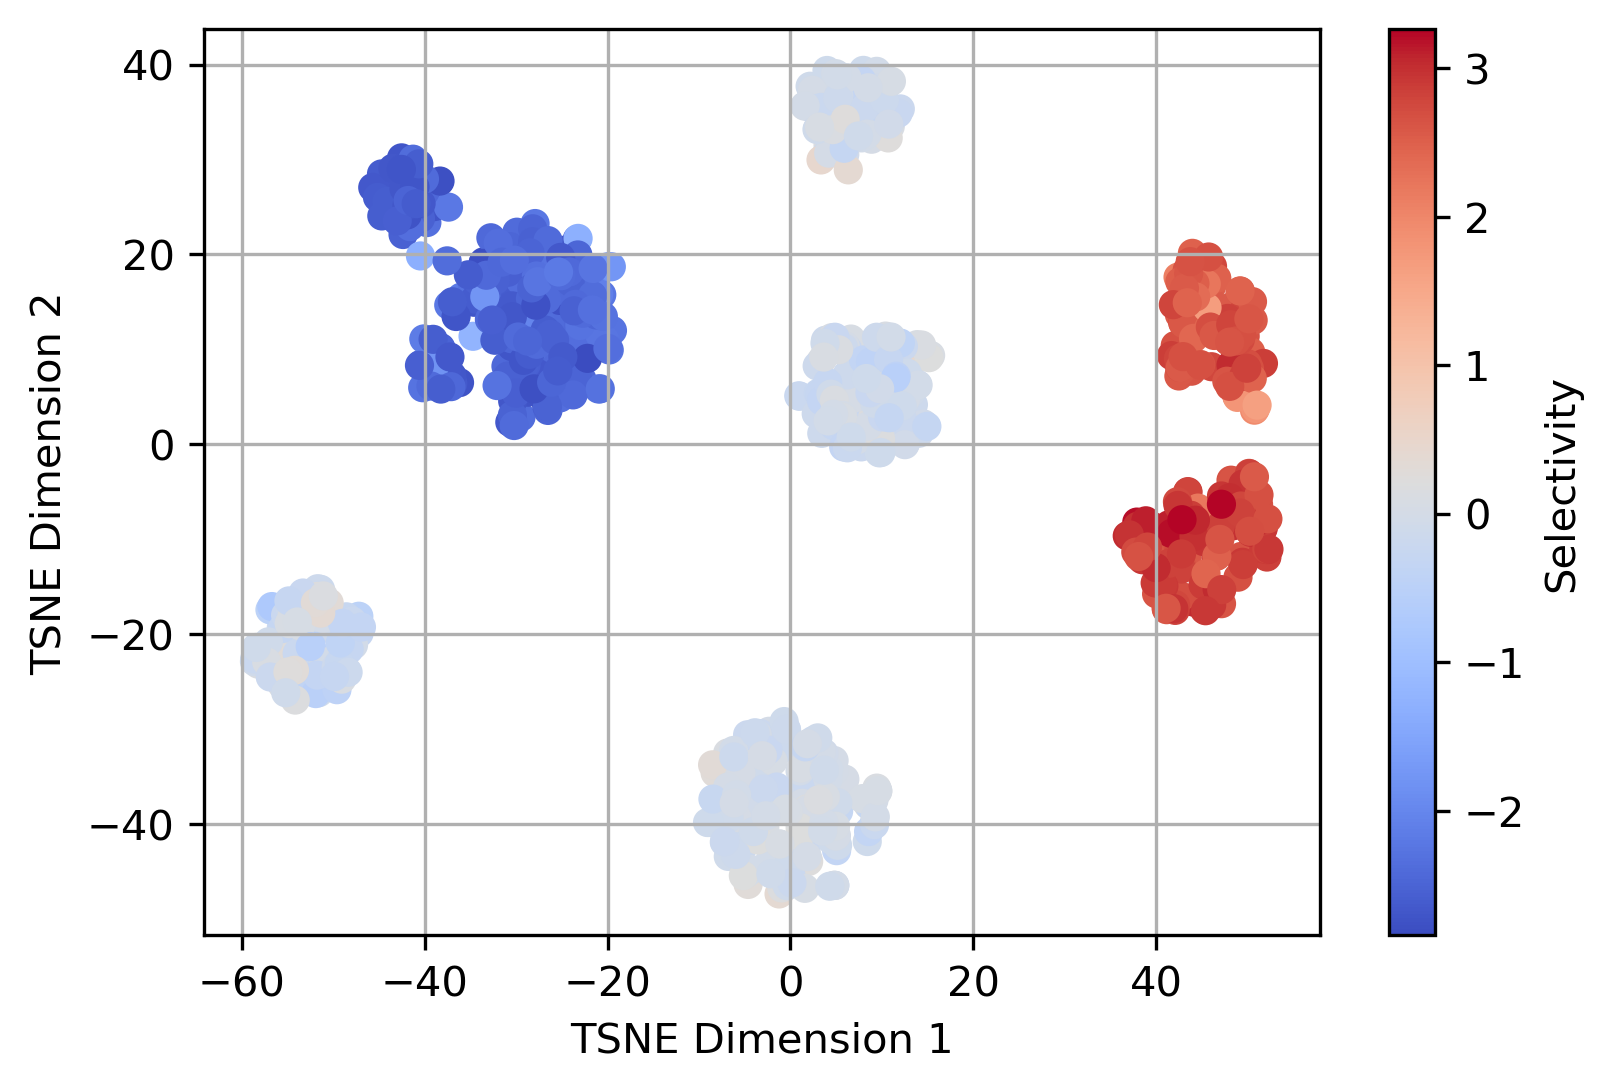

In [45]:
ax = plt.scatter(res[:,0],res[:,1],c=df.DELTA,cmap=plt.cm.coolwarm)
plt.colorbar(ax,label='Selectivity')
plt.xlabel('TSNE Dimension 1')df[(df.CMET_score>7)&(df.DELTA<-2)&(df.QED>0.5)].describe()
plt.ylabel('TSNE Dimension 2')
plt.grid()
plt.savefig('Dimensions.png',dpi=300)

In [65]:
new_df = df[((df.CMET_score>7)&(df.EGFR_score>7))]

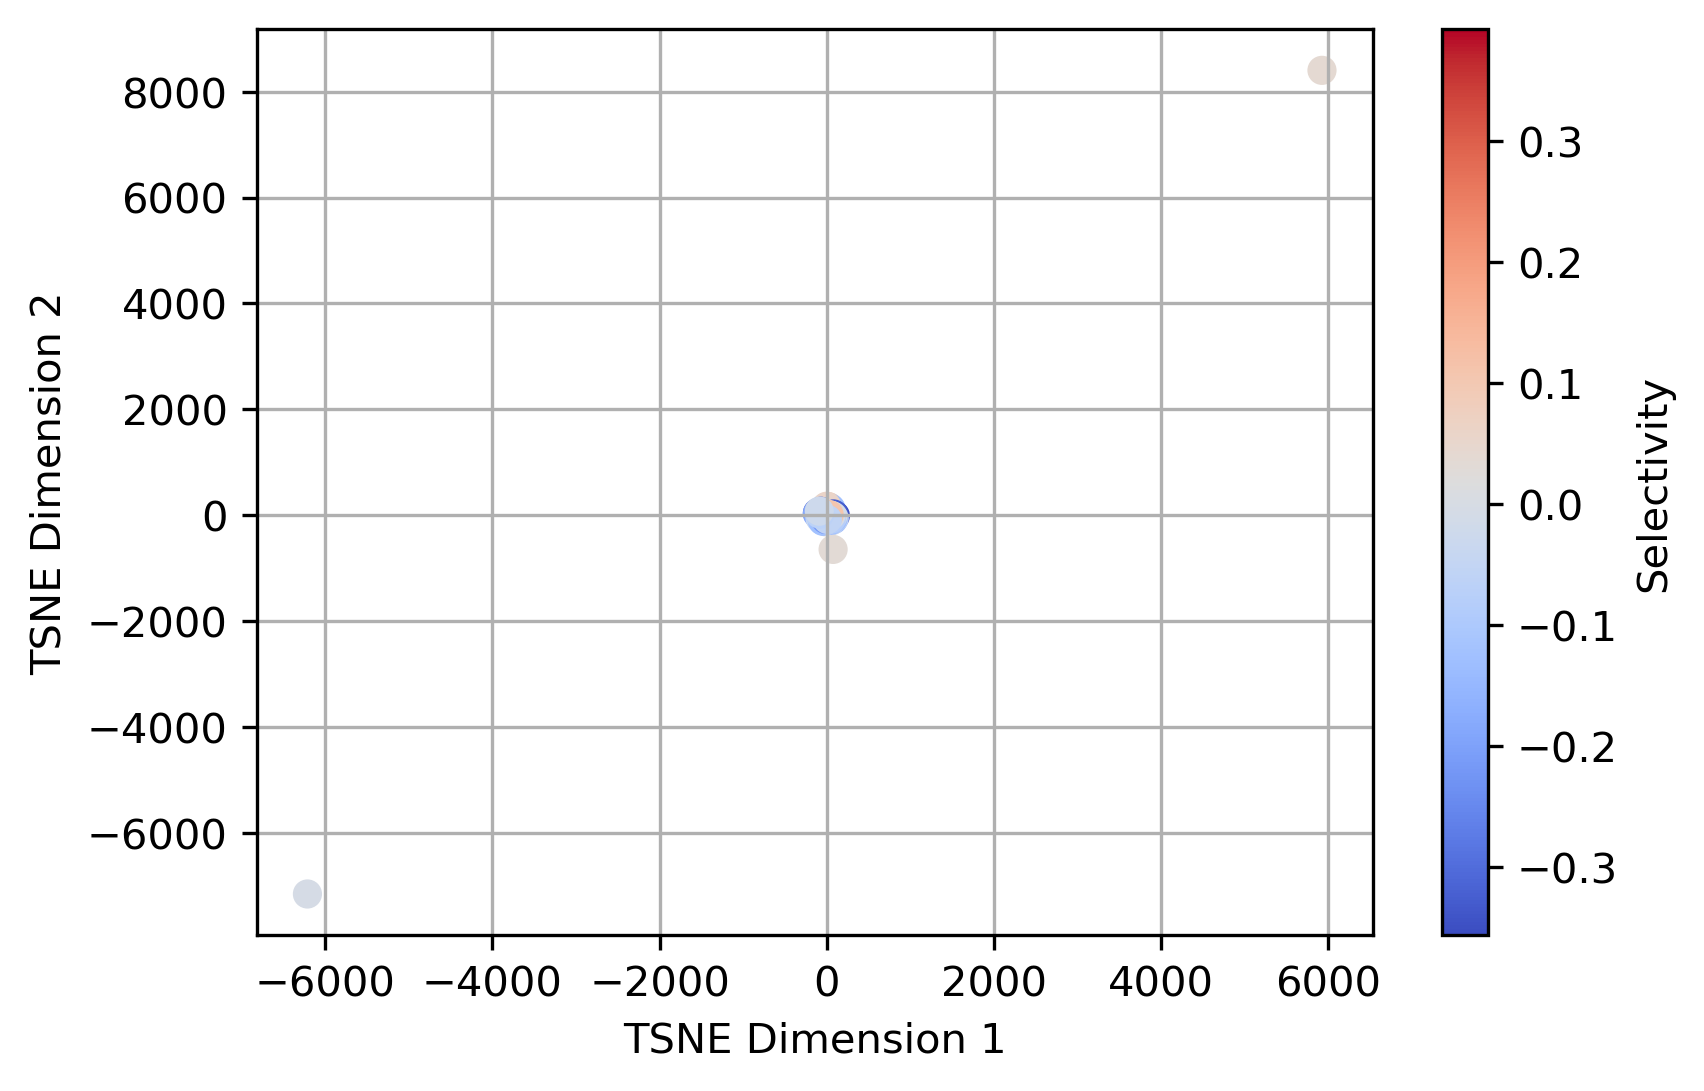

In [66]:
#new_df['FPS'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m,2,1024) for m in new_df.ROMol]
res = tsne.fit_transform(list(new_df.FPS))
ax = plt.scatter(res[:,0],res[:,1],c=new_df.DELTA,cmap=plt.cm.coolwarm)
plt.colorbar(ax,label='Selectivity')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.grid()
plt.savefig('Dimensions.png',dpi=300)

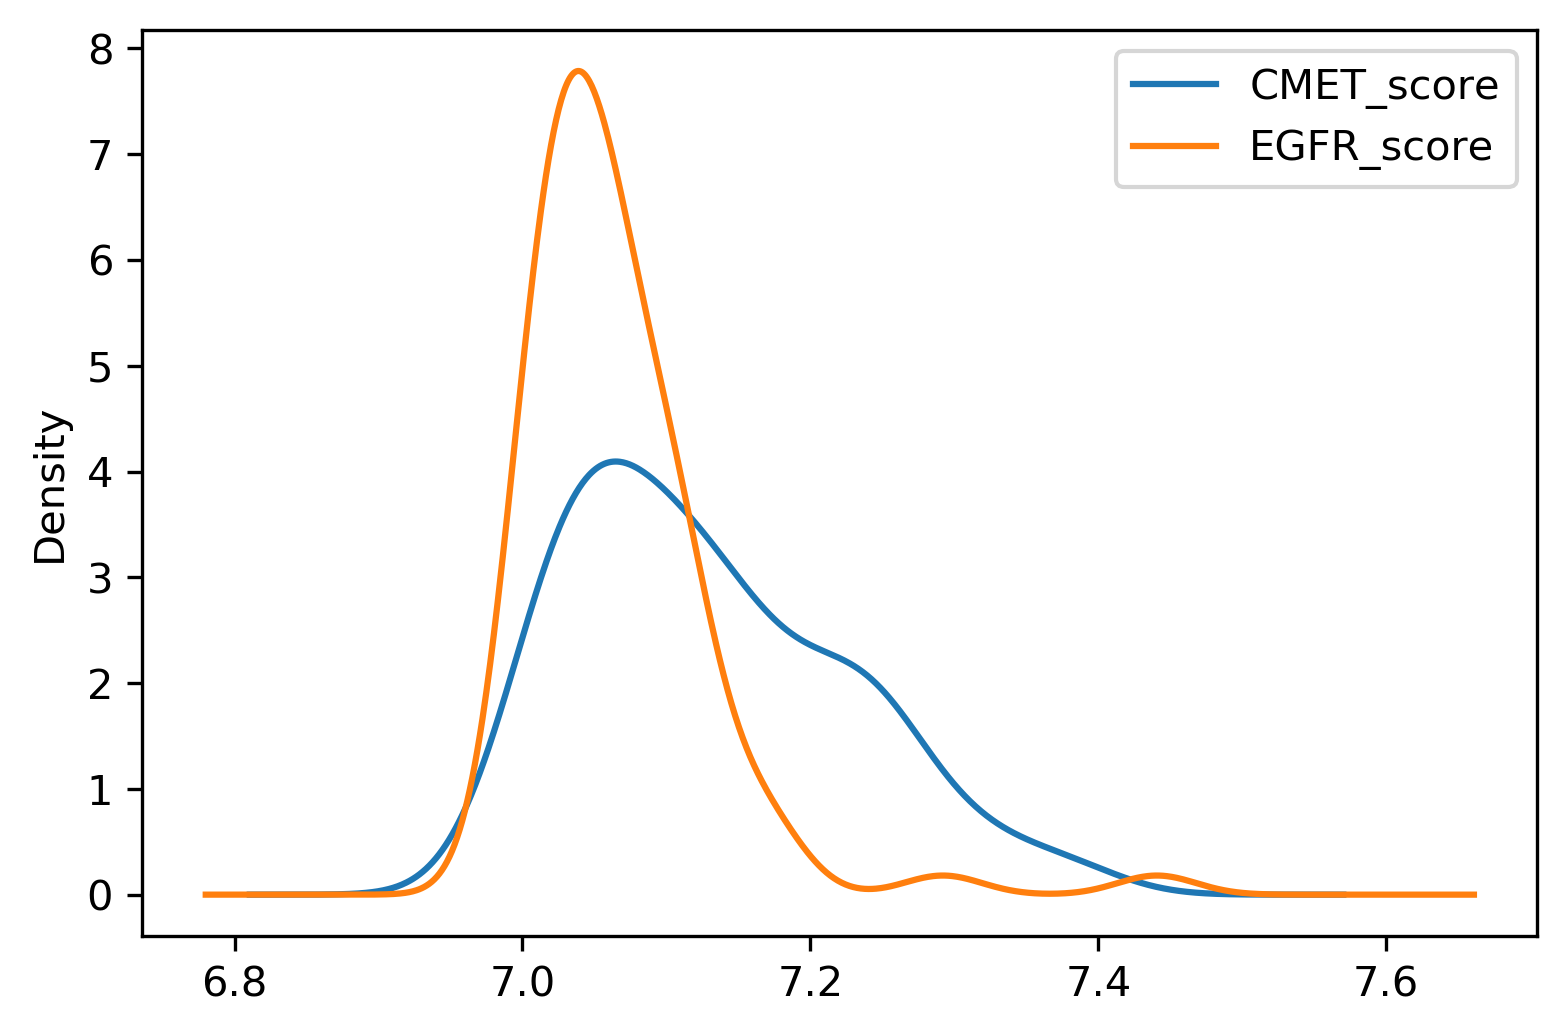

In [67]:
new_df[['CMET_score','EGFR_score']].plot(kind='kde')

In [73]:
new_df['SUM']= (new_df.CMET_score + new_df.EGFR_score)*0.5

/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
new_df.describe()

,Score,PriorLogP,CMET_score,EGFR_score,DELTA,SUM
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1232.418148,-73.167407,7.128951,7.065983,-0.062968,7.097467
std,372.953794,16.918127,0.095033,0.065627,0.117291,0.056831
min,1.000000,-123.310000,7.000498,7.000238,-0.356221,7.006640
25%,1118.610000,-80.660000,7.049048,7.023972,-0.126089,7.051313
50%,1150.560000,-73.240000,7.112270,7.051349,-0.053687,7.083175
75%,1226.020000,-64.140000,7.190262,7.092703,0.002131,7.132252
max,2907.710000,-36.230000,7.380321,7.440710,0.392702,7.244359


In [82]:
new_df = df[((df.CMET_score>7)&(df.DELTA<-2))]

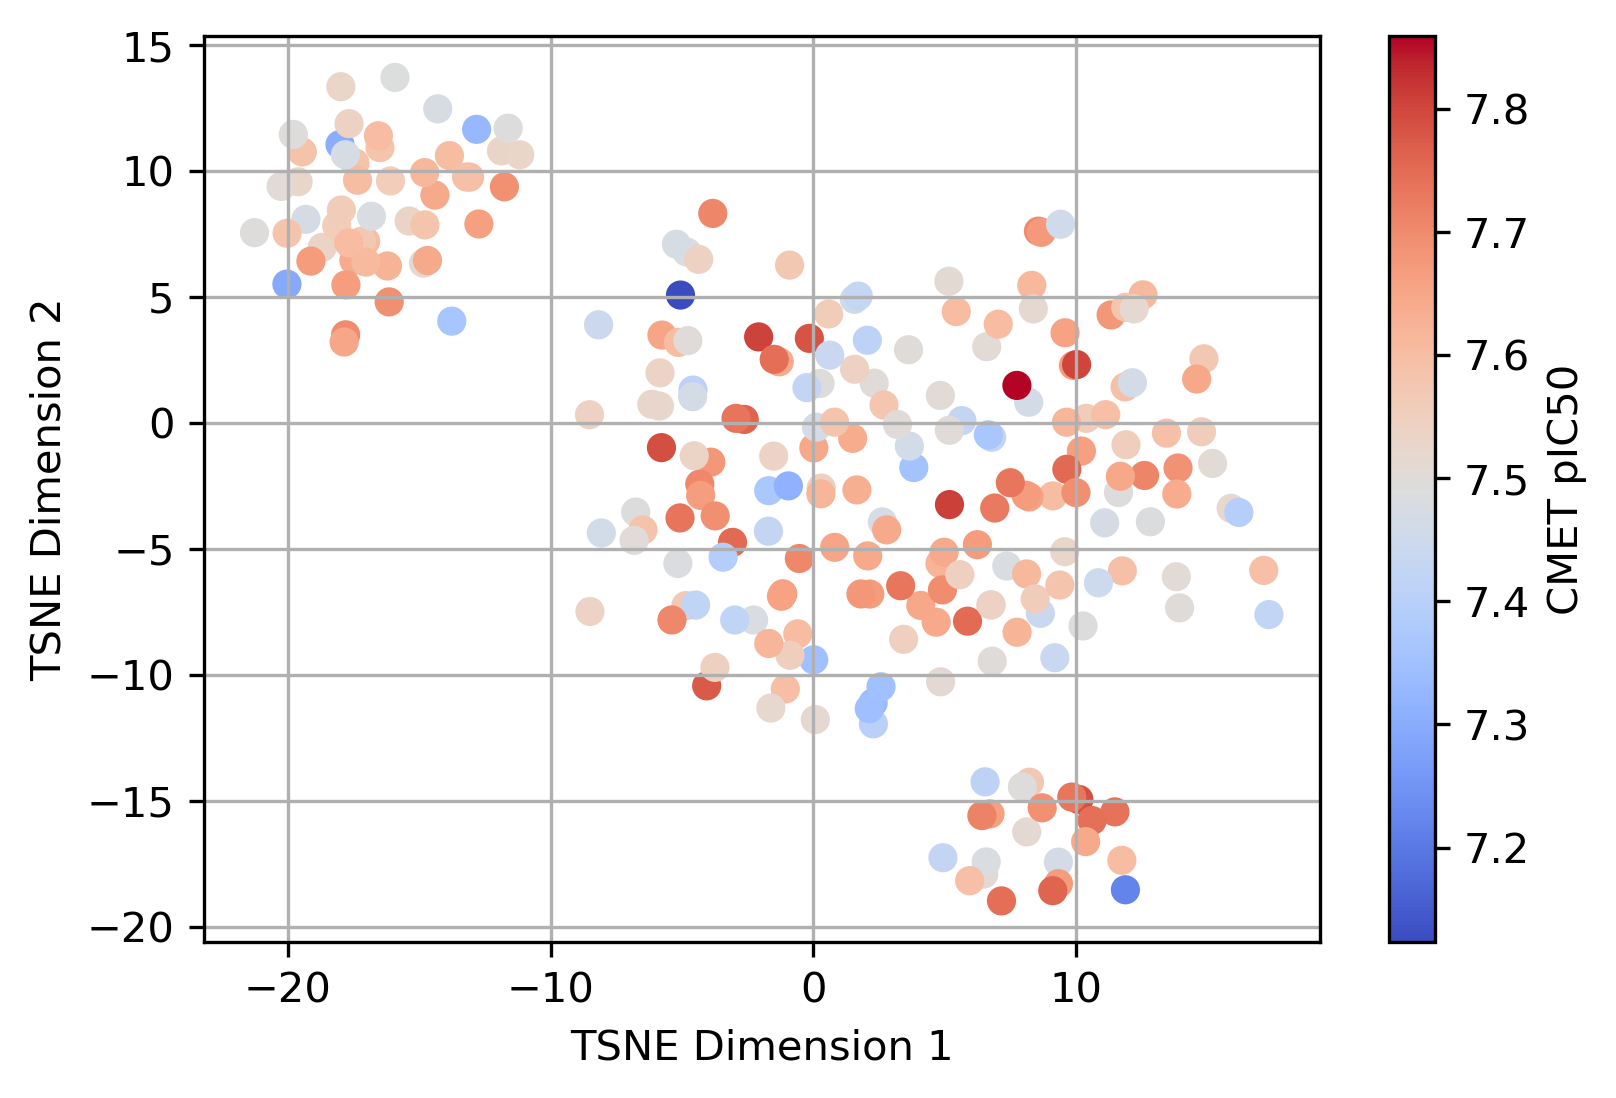

In [84]:
#new_df['FPS'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m,2,1024) for m in new_df.ROMol]
res = tsne.fit_transform(list(new_df.FPS))
ax = plt.scatter(res[:,0],res[:,1],c=new_df.CMET_score,cmap=plt.cm.coolwarm)
plt.colorbar(ax,label='CMET pIC50')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.grid()
plt.savefig('Dimensions.png',dpi=300)

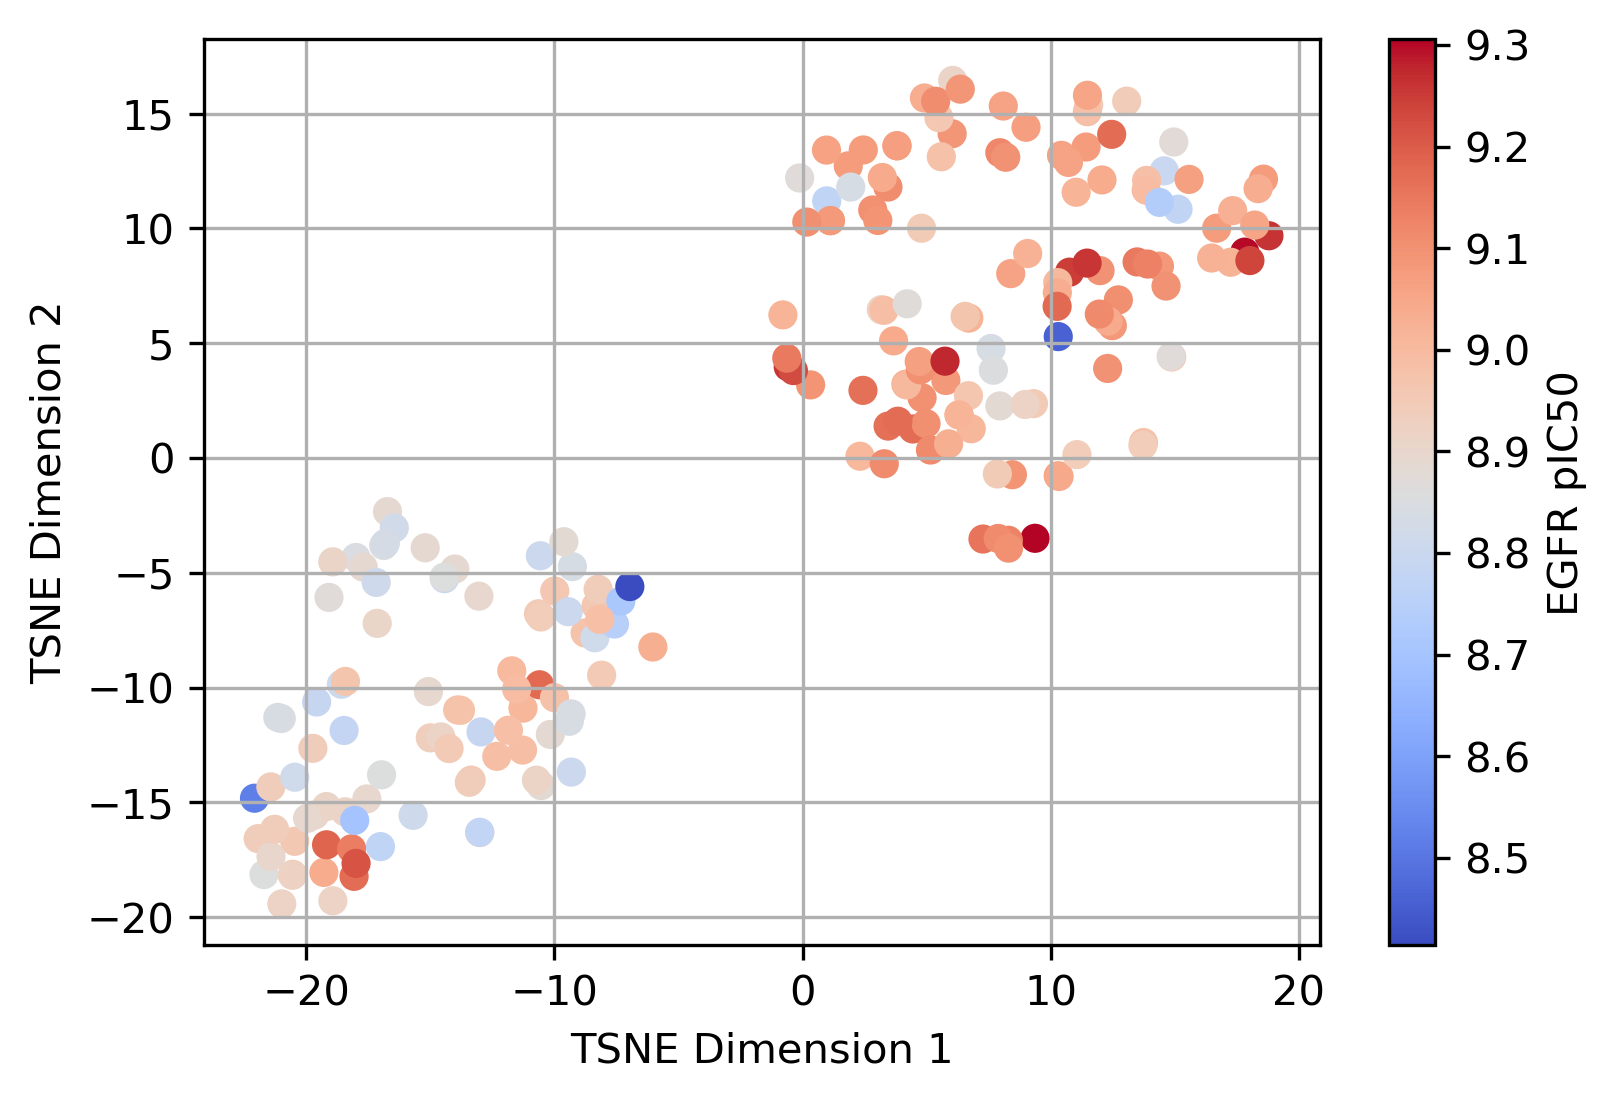

In [86]:
#new_df['FPS'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m,2,1024) for m in new_df.ROMol]
new_df = df[((df.EGFR_score>7)&(df.DELTA>2))]
res = tsne.fit_transform(list(new_df.FPS))
ax = plt.scatter(res[:,0],res[:,1],c=new_df.EGFR_score,cmap=plt.cm.coolwarm)
plt.colorbar(ax,label='EGFR pIC50')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.grid()
plt.savefig('Dimensions.png',dpi=300)

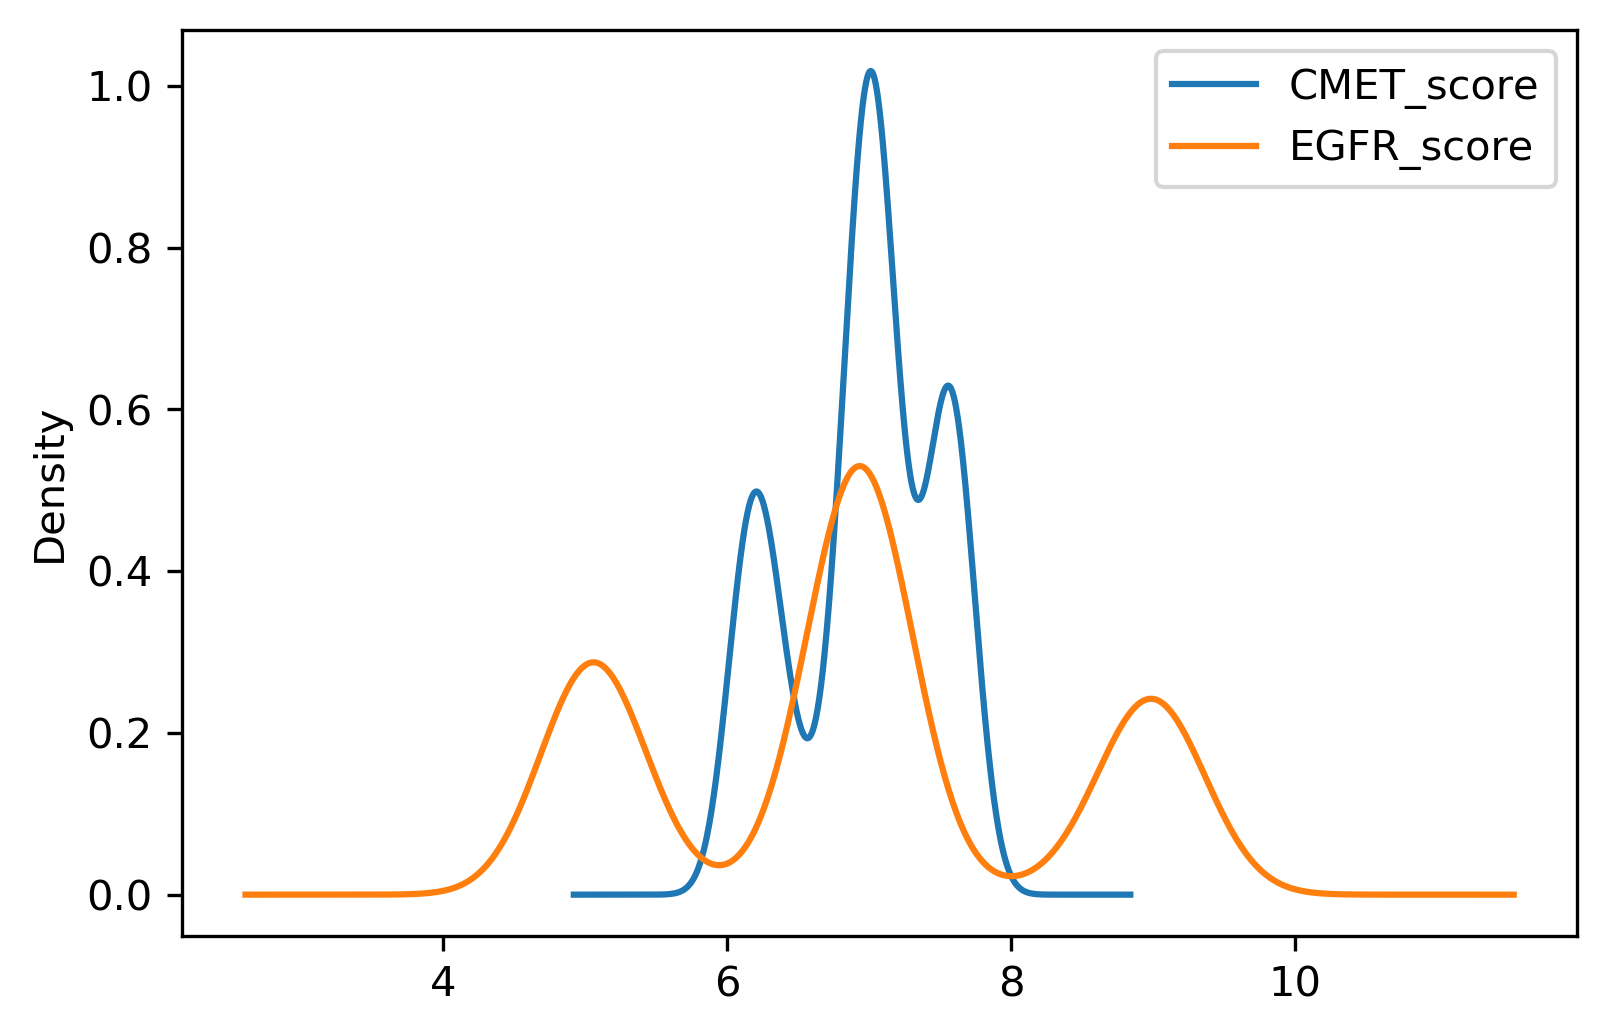

In [88]:
df[['CMET_score','EGFR_score']].plot(kind='kde')

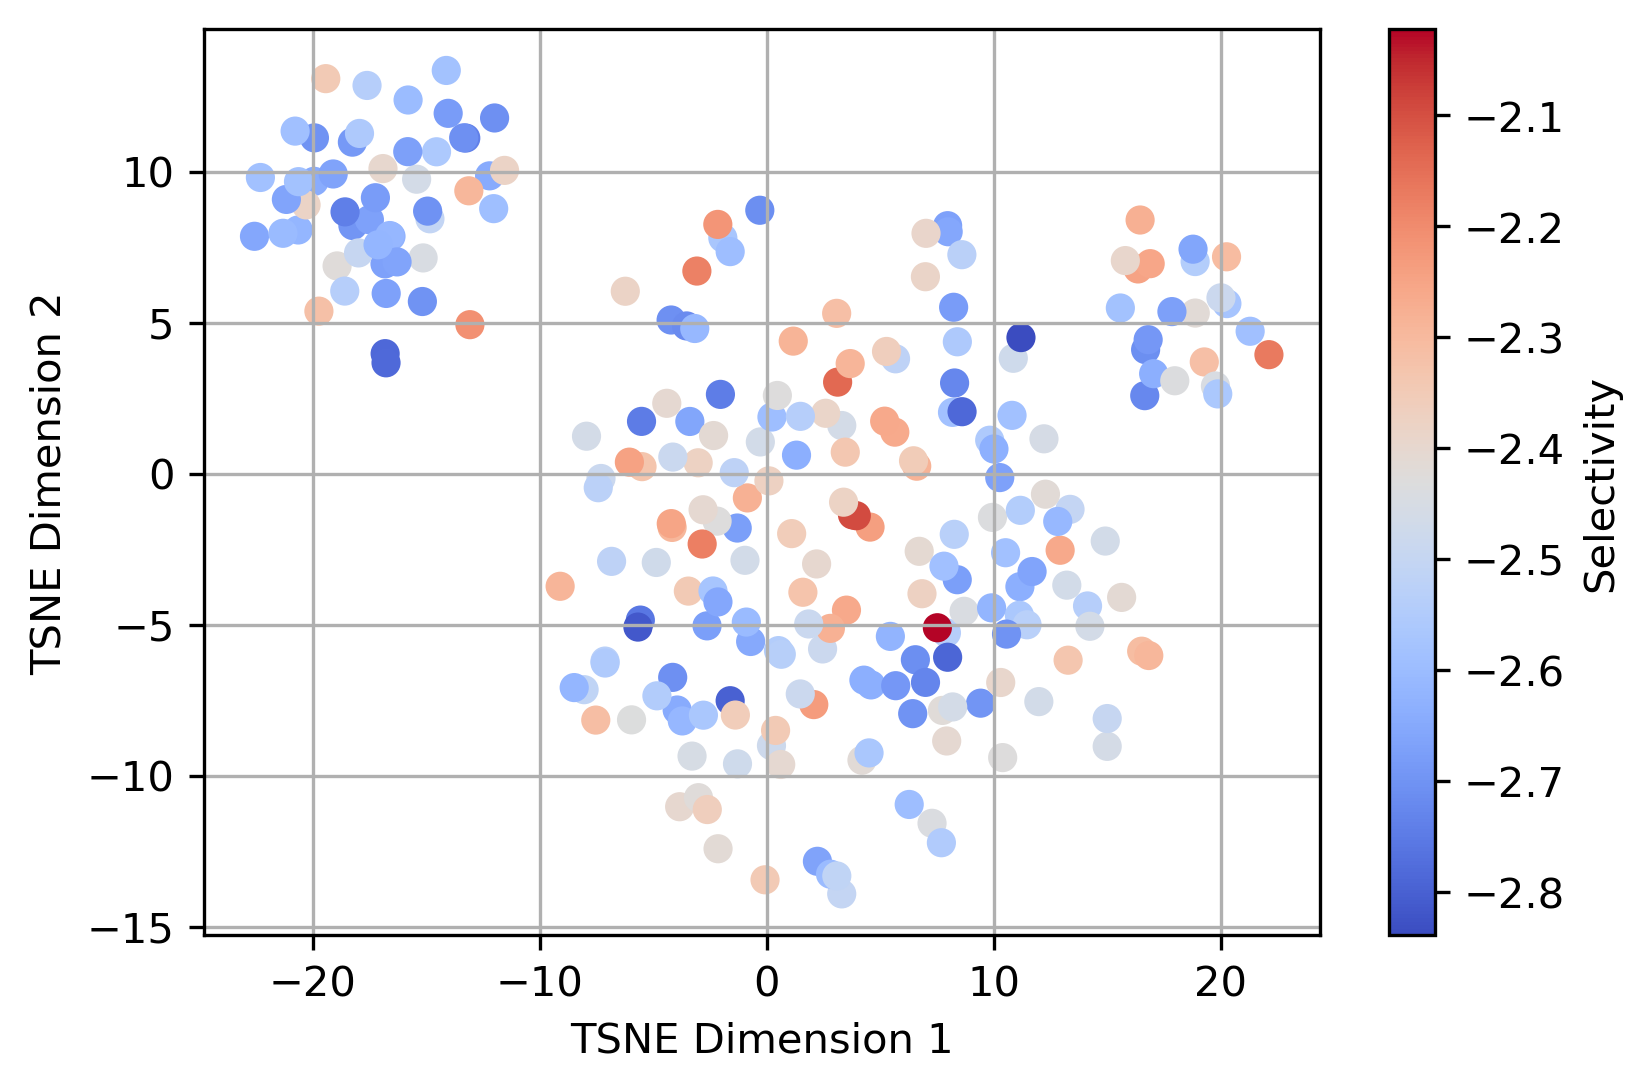

In [89]:
#new_df['FPS'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(m,2,1024) for m in new_df.ROMol]
new_df = df[((df.CMET_score>7)&(df.DELTA<-2))]
res = tsne.fit_transform(list(new_df.FPS))
ax = plt.scatter(res[:,0],res[:,1],c=new_df.DELTA,cmap=plt.cm.coolwarm)
plt.colorbar(ax,label='Selectivity')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.grid()
plt.savefig('Dimensions.png',dpi=300)

# Custering Dual Kinase Inhibitors

In [186]:
from sklearn.cluster import AgglomerativeClustering

In [246]:
dual_kine =  df[((df.CMET_score>7)&(df.EGFR_score>7))]
dual_kine['QED'] = [QED.qed(m) for m in dual_kine.ROMol]
dual_kine = dual_kine[dual_kine.QED>0.5]

/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [247]:
#from rdkit.Chem.Scaffolds import MurckoScaffold

In [248]:
#dual_kine['Scaffold'] = [MurckoScaffold.MurckoScaffoldSmilesFromSmiles(mol) for mol in dual_kine.SMILES]

In [249]:
from rdkit.Chem import DataStructs

In [250]:
dist_mat = []
for fpi in dual_kine.FPS:
    for fpj in dual_kine.FPS:
        dist_mat.append(DataStructs.TanimotoSimilarity(fpi,fpj,returnDistance=True))
dist_mat = np.array(dist_mat)
matrix = dist_mat.reshape((len(dual_kine.FPS),len(dual_kine.FPS)))
cluster = AgglomerativeClustering(n_clusters=None,distance_threshold=0.4,affinity='precomputed',linkage='average')
cluster.fit(matrix)

AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0.4,
                        linkage='average', memory=None, n_clusters=None,
                        pooling_func='deprecated')

In [251]:
dual_kine['CID'] = cluster.labels_

In [253]:
from rdkit.Chem import Draw
for cid in np.unique(cluster.labels_):
    img = Draw.MolsToGridImage(dual_kine[dual_kine.CID==cid]['ROMol'],legends=['EGFR=%.2f CMET=%.2f'%(r.EGFR_score,r.CMET_score) for i,r in dual_kine.iterrows()])
    img.save('Dual/Cluster-%d.png'%cid)

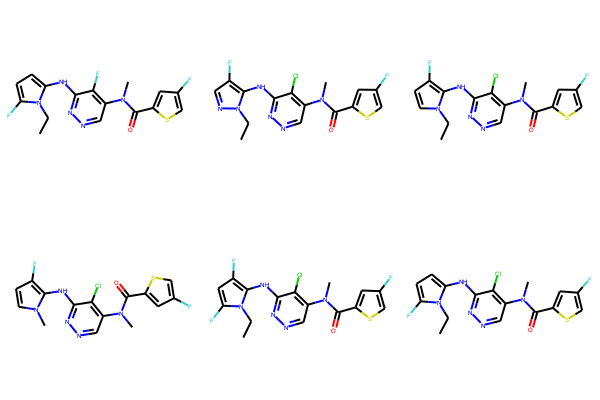

In [198]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==1]['ROMol'])

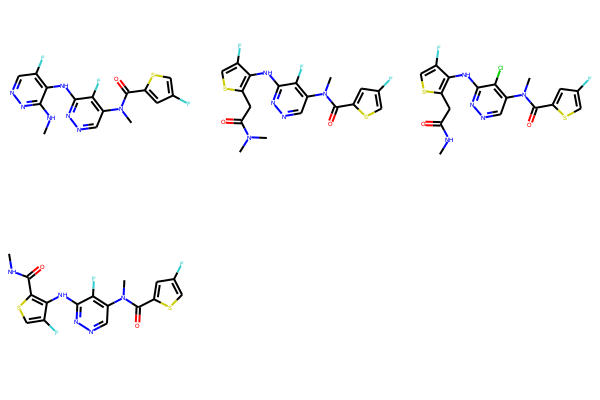

In [199]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==2]['ROMol'])

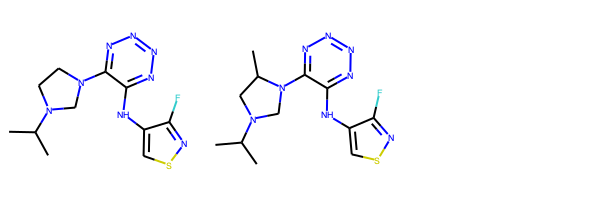

In [200]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==3]['ROMol'])

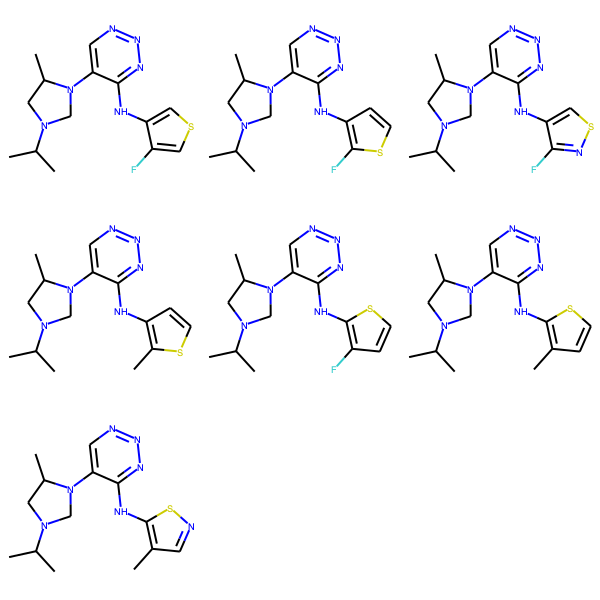

In [201]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==4]['ROMol'])

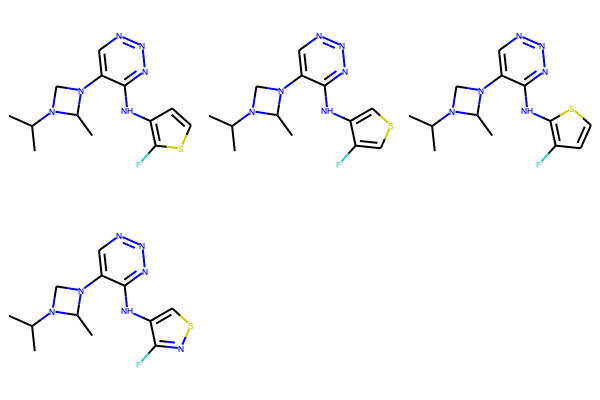

In [202]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==5]['ROMol'])

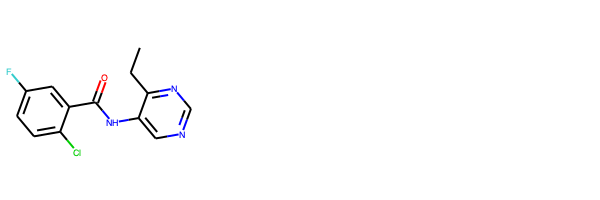

In [203]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==6]['ROMol'])

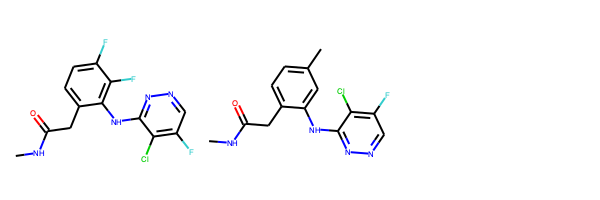

In [204]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==7]['ROMol'])

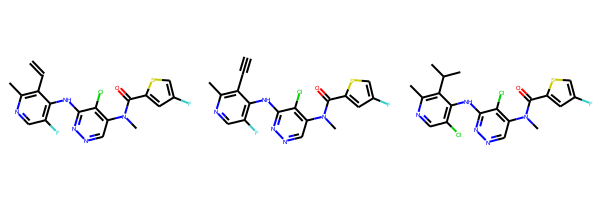

In [205]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==8]['ROMol'])

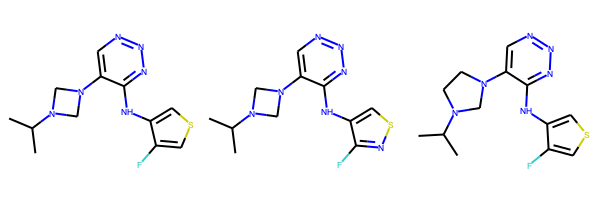

In [206]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==9]['ROMol'])

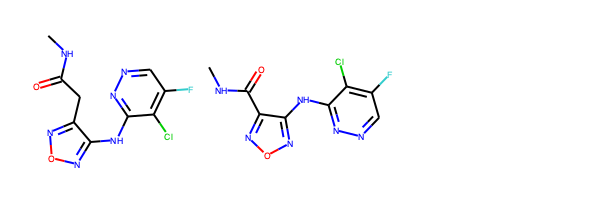

In [207]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==10]['ROMol'])

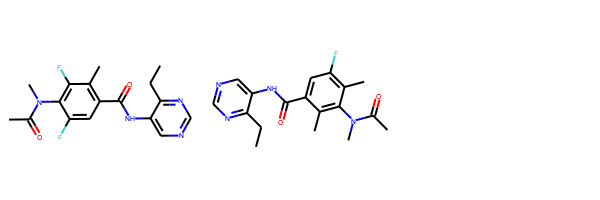

In [208]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==11]['ROMol'])

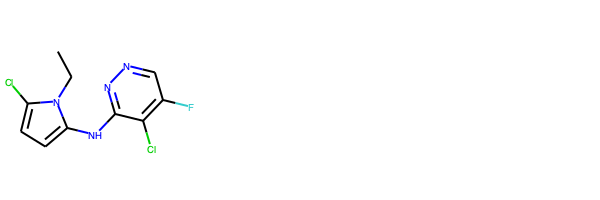

In [209]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==12]['ROMol'])

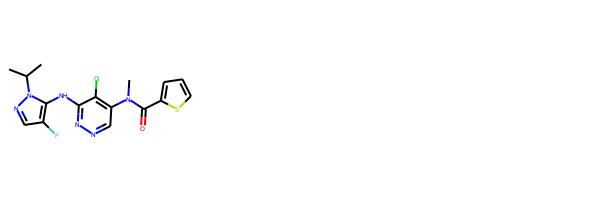

In [210]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==13]['ROMol'])

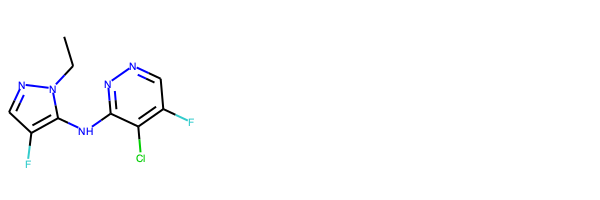

In [211]:
Draw.MolsToGridImage(dual_kine[dual_kine.CID==14]['ROMol'])

In [213]:
df['QED']= [QED.qed(m) for m in df.ROMol]

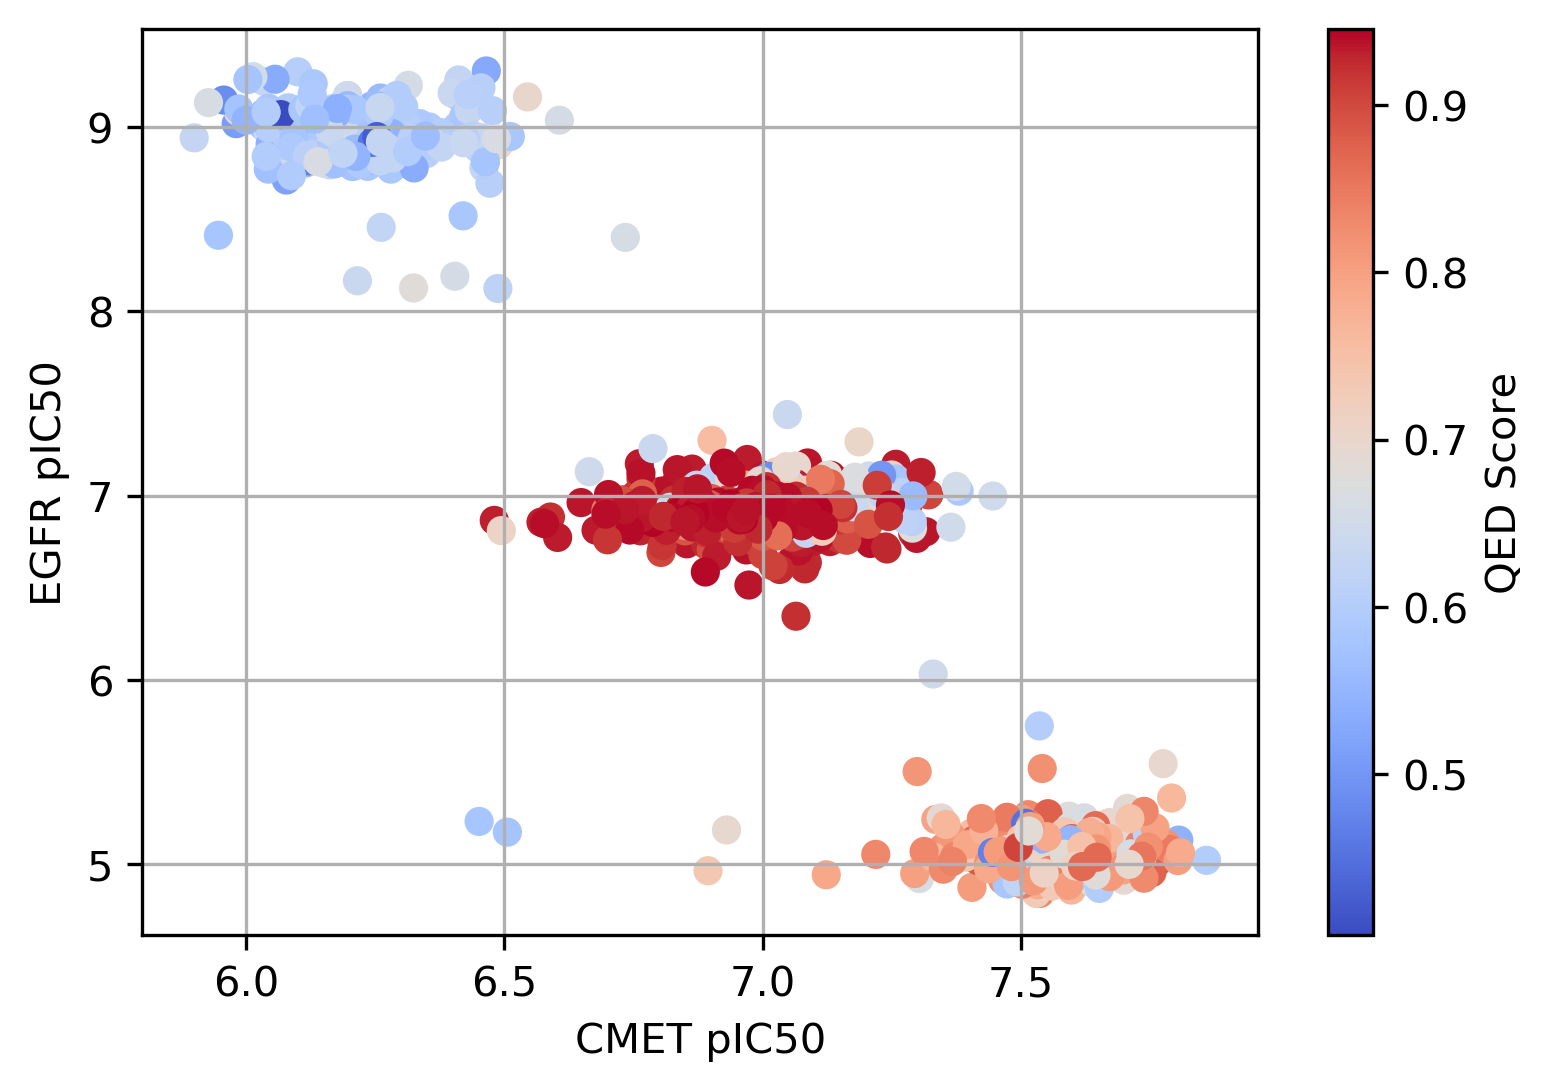

In [216]:
import matplotlib
matplotlib.rcParams['figure.dpi']=300
ax = plt.scatter(df.CMET_score,df.EGFR_score,c=df.QED,cmap=plt.cm.coolwarm)
plt.colorbar(ax,label='QED Score')
plt.xlabel('CMET pIC50')
plt.ylabel('EGFR pIC50')
plt.grid()
plt.savefig('Results.png',dpi=300)

In [237]:
sel_CMET = df[(df.CMET_score>7)&(df.QED>0.7)&(df.DELTA<-2)]

In [238]:
sel_CMET.describe()

,Score,PriorLogP,CMET_score,EGFR_score,DELTA,QED
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,18.941044,-96.058407,7.562046,5.059174,-2.502871,0.806753
std,1.434616,15.252202,0.119432,0.104908,0.158856,0.055798
min,15.250000,-140.090000,7.123186,4.840642,-2.814982,0.700500
25%,17.920000,-105.217500,7.485928,4.987885,-2.634642,0.763238
50%,19.000000,-97.045000,7.559972,5.051495,-2.512055,0.812276
75%,20.060000,-86.532500,7.647354,5.119152,-2.400358,0.846421
max,21.780000,-48.880000,7.808838,5.518659,-2.022438,0.926726


In [259]:
dist_mat = []
sel_CMET['FPS'] = [rdMolDescriptors.GetMorganFingerprintAsBitVect(mol,3,1024) for mol in sel_CMET.ROMol]
for fpi in sel_CMET.FPS:
    for fpj in sel_CMET.FPS:
        dist_mat.append(DataStructs.TanimotoSimilarity(fpi,fpj,returnDistance=True))
dist_mat = np.array(dist_mat)
matrix = dist_mat.reshape((len(sel_CMET.FPS),len(sel_CMET.FPS)))
cluster = AgglomerativeClustering(n_clusters=None,distance_threshold=0.5,affinity='precomputed',linkage='average')
cluster.fit(matrix)
sel_CMET['CID'] = cluster.labels_
#from rdkit.Chem import Draw
for cid in np.unique(cluster.labels_):
    img = Draw.MolsToGridImage(sel_CMET[sel_CMET.CID==cid]['ROMol'],legends=['EGFR=%.2f CMET=%.2f'%(r.EGFR_score,r.CMET_score) for i,r in sel_CMET.iterrows()])
    img.save('SelCMET/Cluster-%d.png'%cid)

/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [257]:
sel_EGFR = df[(df.EGFR_score>7)&(df.QED>0.5)&(df.DELTA>2)]

In [245]:
dist_mat = []
for fpi in sel_EGFR.FPS:
    for fpj in sel_EGFR.FPS:
        dist_mat.append(DataStructs.TanimotoSimilarity(fpi,fpj,returnDistance=True))
dist_mat = np.array(dist_mat)
matrix = dist_mat.reshape((len(sel_EGFR.FPS),len(sel_EGFR.FPS)))
cluster = AgglomerativeClustering(n_clusters=None,distance_threshold=0.4,affinity='precomputed',linkage='average')
cluster.fit(matrix)
sel_EGFR['CID'] = cluster.labels_
#from rdkit.Chem import Draw
for cid in np.unique(cluster.labels_):
    img = Draw.MolsToGridImage(sel_EGFR[sel_EGFR.CID==cid]['ROMol'],legends=['EGFR=%.2f CMET=%.2f'%(r.EGFR_score,r.CMET_score) for i,r in sel_EGFR.iterrows()])
    img.save('SelEGFR/Cluster-%d.png'%cid)

/Users/leela.dodda/anaconda3/envs/cinf/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [254]:
from rdkit.Chem.Descriptors import RingCount

,SMILES,Score,PriorLogP,CMET_score,EGFR_score,DELTA,ROMol,FPS,QED,CID
512,CC1CC(F)CN(c2nocc2F)C(=O)CC1CC1CNCCOC1C,18.45,-81.04,7.623363,5.203613,-2.419750,<rdkit.Chem.rdchem.Mol object at 0x11e9ecd00>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.884469,20
513,CC1CN(C)CN(c2nocc2F)C(=O)CC1CN1CC(F)CN(C)COC1,16.56,-109.11,7.404178,5.167435,-2.236744,<rdkit.Chem.rdchem.Mol object at 0x11e9ecd50>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.754333,22
515,CC1CCCNC(C)NN(c2nocc2F)C(=O)CC1CC1CSC1C,20.32,-105.36,7.536845,4.840642,-2.696203,<rdkit.Chem.rdchem.Mol object at 0x11e9ecdf0>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.834201,11
516,CC1C(F)CN(c2nocc2F)C(=O)CC1CCC1CCOCN(C)COC1C,17.16,-120.50,7.506904,5.220535,-2.286369,<rdkit.Chem.rdchem.Mol object at 0x11e9ece40>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.752354,37
517,CC1CC(F)CN(c2nocc2F)C(=O)CC1CC1CS1,19.09,-78.87,7.527251,4.991273,-2.535978,<rdkit.Chem.rdchem.Mol object at 0x11e9ece90>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.804248,1
...,...,...,...,...,...,...,...,...,...,...
760,CC1CCCNC(C)NN(c2nocc2F)C(=O)CC1CC1CCCCNC1C,19.90,-114.02,7.605874,4.989571,-2.616303,<rdkit.Chem.rdchem.Mol object at 0x11c202a80>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.711272,11
762,CC1CCC(N)CN(c2nocc2F)C(=O)CC1CC1CNCCOC1C,16.16,-90.12,7.423383,5.246959,-2.176424,<rdkit.Chem.rdchem.Mol object at 0x11c202b20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.829636,0
763,CC1CCNC(C)CN(c2nocc2F)C(=O)CC1COC1COCNC(C)COC1C,19.57,-119.75,7.544954,4.951027,-2.593927,<rdkit.Chem.rdchem.Mol object at 0x11c202b70>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.709394,7
764,CC1CCC(F)CN(c2nocc2F)C(=O)CC1CNC1COCOC1,20.06,-104.14,7.619124,4.986143,-2.632981,<rdkit.Chem.rdchem.Mol object at 0x11c202bc0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.868556,8


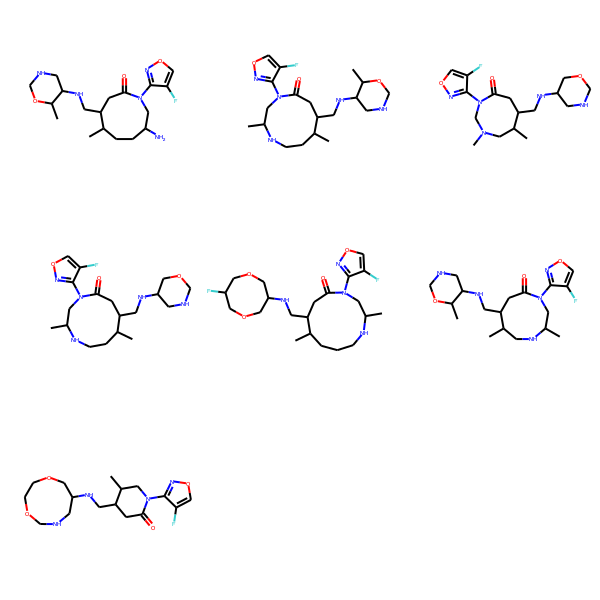

In [264]:
Draw.MolsToGridImage(sel_CMET[sel_CMET.CID==0]['ROMol'])

In [265]:
mols = list(sel_CMET[sel_CMET.CID==0]['ROMol'])

In [266]:
mol = mols[0]

In [267]:
mol.HasSubstructMatch(Chem.MolFromSmarts('[r{6-}]'))

True

In [271]:
Chem.MolFromSmiles('C1=CC=C2C(=C1)C=CC=N2').HasSubstructMatch(Chem.MolFromSmarts('[r{7-20}]'))

False

In [272]:
import rdkit

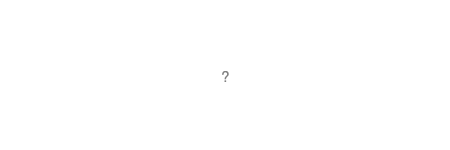

In [273]:
Chem.MolFromSmarts('[r{7-20}]')

'2019.03.4'